# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | Top Ten REASONS to not use Brit...
1,Not Verified | Easy check in on the way to He...
2,✅ Trip Verified | Online check in worked fine...
3,✅ Trip Verified |. The BA first lounge at Term...
4,Not Verified | Paid a quick visit to Nice yest...


In [4]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
df.head(5)

,reviews
0,Not Verified | Top Ten REASONS to not use Brit...
1,Not Verified | Easy check in on the way to He...
2,✅ Trip Verified | Online check in worked fine...
3,✅ Trip Verified |. The BA first lounge at Term...
4,Not Verified | Paid a quick visit to Nice yest...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,reviews
count,1000
unique,1000
top,✅ Trip Verified | Athens to Los Angeles via L...
freq,1


In [8]:
t='ahmed'

In [9]:
u=t.rsplit('ah')

In [10]:
u.remove(u[0])

In [11]:
u

['med']

In [12]:
u[0]

'med'

In [13]:
df["reviews"]= df["reviews"].str.split("|", n = 2, expand = False)
    
    

In [14]:
df['reviews']

0      [Not Verified ,  Top Ten REASONS to not use Br...
1      [Not Verified ,   Easy check in on the way to ...
2      [✅ Trip Verified ,   Online check in worked fi...
3      [✅ Trip Verified , . The BA first lounge at Te...
4      [Not Verified ,  Paid a quick visit to Nice ye...
                             ...                        
995    [✅ Trip Verified ,   Aberdeen to Boston via Lo...
996    [✅ Trip Verified ,   London to Hamburg. Baggag...
997    [✅ Trip Verified ,  Flew London Heathrow to Ho...
998    [✅ Trip Verified ,  Flew to Istanbul with Brit...
999    [✅ Trip Verified ,   Munich to London Heathrow...
Name: reviews, Length: 1000, dtype: object

In [15]:
for i in df["reviews"]:
    i.remove(i[0])

In [16]:
df['reviews'][3]

[". The BA first lounge at Terminal 5 was a\xa0 zoo at 2pm, dirty tables and used tableware everywhere. Worse than this, the usual atrocious boarding gate service, and boarding started 50 mins late. The flight was operated by a Finnair A320, which is barely low cost standard let alone business class. Hard, thin, uncomfortable seats, poor legroom and the cabin was simply tatty - I remain shocked that BA allow this, and it's time for BA's CEO and management focused on standards rather than bean counting. Finnair cabin staff were fundamentally courteous, but they provide a very trimmed down, budget airline type service, as the whole trip turned out to be - and yet this business class ticket was one of the more expensive on recent trips. I thought post Covid that BA were better for a few months, but with\xa0the many cost cuts they are making, they fall well below all other European full service Airlines.\xa0"]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [18]:
df['reviews']

0      [ Top Ten REASONS to not use British Airways T...
1      [  Easy check in on the way to Heathrow. The f...
2      [  Online check in worked fine. Quick security...
3      [. The BA first lounge at Terminal 5 was a  zo...
4      [ Paid a quick visit to Nice yesterday from He...
                             ...                        
995    [  Aberdeen to Boston via London Heathrow. I f...
996    [  London to Hamburg. Baggage self-check-in wa...
997    [ Flew London Heathrow to Hong Kong with Briti...
998    [ Flew to Istanbul with British Airways on 5th...
999    [  Munich to London Heathrow with British Airw...
Name: reviews, Length: 1000, dtype: object

In [19]:
 df.head(4)

,reviews
0,[ Top Ten REASONS to not use British Airways T...
1,[ Easy check in on the way to Heathrow. The f...
2,[ Online check in worked fine. Quick security...
3,[. The BA first lounge at Terminal 5 was a zo...


In [20]:
#[1]
df['reviews'] = [','.join(map(str, l)) for l in df['reviews']]

In [21]:
df['reviews']

0       Top Ten REASONS to not use British Airways To...
1        Easy check in on the way to Heathrow. The fl...
2        Online check in worked fine. Quick security ...
3      . The BA first lounge at Terminal 5 was a  zoo...
4       Paid a quick visit to Nice yesterday from Hea...
                             ...                        
995      Aberdeen to Boston via London Heathrow. I fo...
996      London to Hamburg. Baggage self-check-in was...
997     Flew London Heathrow to Hong Kong with Britis...
998     Flew to Istanbul with British Airways on 5th ...
999      Munich to London Heathrow with British Airwa...
Name: reviews, Length: 1000, dtype: object

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [24]:
df.head(10)

,reviews
0,Top Ten REASONS to not use British Airways To...
1,Easy check in on the way to Heathrow. The fl...
2,Online check in worked fine. Quick security ...
3,. The BA first lounge at Terminal 5 was a zoo...
4,Paid a quick visit to Nice yesterday from Hea...
5,Words fail to describe this last awful fligh...
6,Absolutely terrible experience. The app woul...
7,BA overbook every flight to maximise their in...
8,"\r\nThe flights were all on time, except Bel..."
9,Only the second time flying BA as first time ...


In [25]:
#[2]
df[df.columns] = df.apply(lambda x: x.str.strip())

In [26]:
df.head(10)

,reviews
0,Top Ten REASONS to not use British Airways To ...
1,Easy check in on the way to Heathrow. The flig...
2,Online check in worked fine. Quick security ch...
3,. The BA first lounge at Terminal 5 was a zoo...
4,Paid a quick visit to Nice yesterday from Heat...
5,Words fail to describe this last awful flight ...
6,Absolutely terrible experience. The app would ...
7,BA overbook every flight to maximise their inc...
8,"The flights were all on time, except Belfast f..."
9,Only the second time flying BA as first time w...


In [27]:
df['reviews'][5]

"Words fail to describe this last awful flight - baby across the aisle crying for most of the flight and although horrible to go without any rest for the long flight LHR/SFO, it's understandable for a baby to cry nonstop - but the crew yakking loudly in the galley even after a polite notification that their conversation could be heard in the cabin - that made the flight unbearable for any rest or sleep (always difficult anyway westbound). The food was so bad that most  turned down whatever the nasty offering was on the 2nd service. What happened to the really nice tea and scones? I've said this before after suffering through the BA concept of customer service (i.e. don't do anything to help the passenger if it involves any extra work) - this time i swear i mean it - never again on BA please! The lounge was so packed even a single traveler had a hard time finding a seat - poor BA is on the skids downhill."

In [28]:
#data cleaning 
#1:remove unicode characters
#2: lower the case
#3:remove stopwords :words that dont give meaning in english
#4:
[3]
#Remove punctuation/lower casing
# Load the regular expression library
import re
# Remove punctuation (unicode characters)
df['reviews_processed'] = \
df['reviews'].map(lambda x: re.sub('(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?', '', x))
# Convert the titles to lowercase
df['reviews_processed'] = \
df['reviews_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
df['reviews_processed'].head()

0    top ten reasons to not use british airways to ...
1    easy check in on the way to heathrow the fligh...
2    online check in worked fine quick security che...
3     the ba first lounge at terminal 5 was a zoo a...
4    paid a quick visit to nice yesterday from heat...
Name: reviews_processed, dtype: object

In [29]:
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eng_m\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
stop = stopwords.words('english')
#text = "my package from amazon never arrived fix this asap"

df['reviews_processed'].map(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))



#text = " ".join(\[word for word in text.split() if word not in (stop)])

0      top ten reasons use british airways aware noti...
1      easy check way heathrow flight time issues ret...
2      online check worked fine quick security check ...
3      ba first lounge terminal 5 zoo 2pm dirty table...
4      paid quick visit nice yesterday heathrow decid...
                             ...                        
995    aberdeen boston via london heathrow found seat...
996    london hamburg baggage selfcheckin diabolical ...
997    flew london heathrow hong kong british airways...
998    flew istanbul british airways 5th june passpor...
999    munich london heathrow british airways booked ...
Name: reviews_processed, Length: 1000, dtype: object

In [34]:
#test :
text = "my package from amazon never arrived fix this asap"
text = " ".join([word for word in text.split() if word not in (stop)])

print(text)

package amazon never arrived fix asap


In [33]:
df.head()

,reviews,reviews_processed
0,Top Ten REASONS to not use British Airways To ...,top ten reasons to not use british airways to ...
1,Easy check in on the way to Heathrow. The flig...,easy check in on the way to heathrow the fligh...
2,Online check in worked fine. Quick security ch...,online check in worked fine quick security che...
3,. The BA first lounge at Terminal 5 was a zoo...,the ba first lounge at terminal 5 was a zoo a...
4,Paid a quick visit to Nice yesterday from Heat...,paid a quick visit to nice yesterday from heat...


In [ ]:
# # Remove the columns
# papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)
# # Print out the first rows of papers
# papers.head()

In [ ]:
 pip install wordcloud

In [ ]:
pip install --upgrade pillow

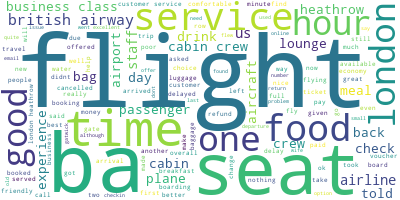

In [35]:
#data exploratory
#[3]
# Import the wordcloud library
#from wordcloud import WordCloud
import re  
import matplotlib.pyplot as plt  
from wordcloud import WordCloud, STOPWORDS 
# Join the different processed titles together.
long_string = ','.join(list(df['reviews_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

the words 'flight' ,'london' , 'seat' , 'service' ,'time' are the most frequent words in the sentences 

In [36]:
df['reviews_processed']

0      top ten reasons to not use british airways to ...
1      easy check in on the way to heathrow the fligh...
2      online check in worked fine quick security che...
3       the ba first lounge at terminal 5 was a zoo a...
4      paid a quick visit to nice yesterday from heat...
                             ...                        
995    aberdeen to boston via london heathrow i found...
996    london to hamburg baggage selfcheckin was diab...
997    flew london heathrow to hong kong with british...
998    flew to istanbul with british airways on 5th j...
999    munich to london heathrow with british airways...
Name: reviews_processed, Length: 1000, dtype: object

In [37]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


In [38]:
from textblob import TextBlob

In [39]:
#[5]
# text_1 = "The movie was so awesome."
# text_2 = "The food here tastes terrible."

#Determining the Polarity 
p_1 = TextBlob(df['reviews_processed'][1]).sentiment.polarity
#p_2 = TextBlob(text_2).sentiment.polarity

#Determining the Subjectivity
s_1 = TextBlob(df['reviews_processed'][1]).sentiment.subjectivity
#s_2 = TextBlob(text_2).sentiment.subjectivity

print("Polarity of Text 1 is", p_1)
#print("Polarity of Text 2 is", p_2)
print("Subjectivity of Text 1 is", s_1)
#print("Subjectivity of Text 2 is", s_2)

Polarity of Text 1 is 0.09666666666666668
Subjectivity of Text 1 is 0.3066666666666667


In [40]:
df[['polarity', 'subjectivity']] = df['reviews_processed'].apply(lambda reviews_processed: pd.Series(TextBlob(reviews_processed).sentiment))


In [41]:
df

,reviews,reviews_processed,polarity,subjectivity
0,Top Ten REASONS to not use British Airways To ...,top ten reasons to not use british airways to ...,0.047209,0.533032
1,Easy check in on the way to Heathrow. The flig...,easy check in on the way to heathrow the fligh...,0.096667,0.306667
2,Online check in worked fine. Quick security ch...,online check in worked fine quick security che...,0.411111,0.616667
3,. The BA first lounge at Terminal 5 was a zoo...,the ba first lounge at terminal 5 was a zoo a...,-0.089712,0.499853
4,Paid a quick visit to Nice yesterday from Heat...,paid a quick visit to nice yesterday from heat...,0.209470,0.450985
...,...,...,...,...
995,Aberdeen to Boston via London Heathrow. I foun...,aberdeen to boston via london heathrow i found...,0.040000,0.365000
996,London to Hamburg. Baggage self-check-in was d...,london to hamburg baggage selfcheckin was diab...,0.161364,0.504545
997,Flew London Heathrow to Hong Kong with British...,flew london heathrow to hong kong with british...,-0.013095,0.534524
998,Flew to Istanbul with British Airways on 5th J...,flew to istanbul with british airways on 5th j...,0.038021,0.286979


In [42]:
df.describe()

,polarity,subjectivity
count,1000.000000,1000.000000
mean,0.079054,0.490809
std,0.198826,0.127314
min,-0.766667,0.000000
25%,-0.039676,0.416258
50%,0.067045,0.490427
75%,0.196765,0.565606
max,0.715000,0.950000


<AxesSubplot:ylabel='Frequency'>

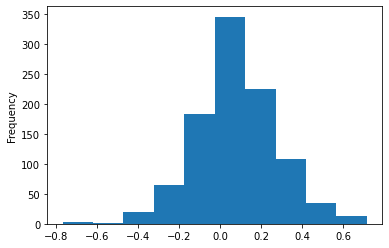

In [43]:
df.polarity.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

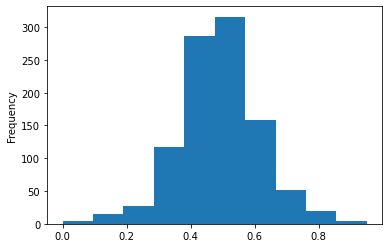

In [44]:
df.subjectivity.plot(kind='hist')

In [45]:
u=df.polarity.max()


In [46]:
df.loc[df['polarity'] == u]

,reviews,reviews_processed,polarity,subjectivity
555,Gatwick to St Lucia. Great service on this fli...,gatwick to st lucia great service on this flig...,0.715,0.69


In [47]:

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.offsetbox import AnchoredText
%matplotlib inline


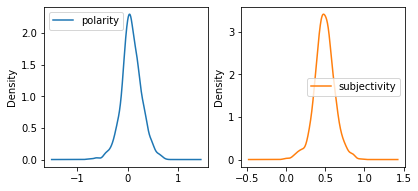

In [48]:
# reference [6]:
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False,figsize=(10,10))
plt.show()

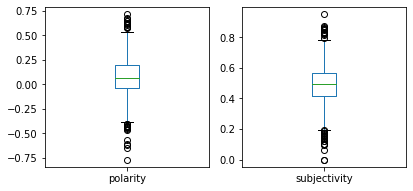

In [49]:
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False,figsize=(10,10))
plt.show()

In [ ]:
df.info()

In [50]:
df

,reviews,reviews_processed,polarity,subjectivity
0,Top Ten REASONS to not use British Airways To ...,top ten reasons to not use british airways to ...,0.047209,0.533032
1,Easy check in on the way to Heathrow. The flig...,easy check in on the way to heathrow the fligh...,0.096667,0.306667
2,Online check in worked fine. Quick security ch...,online check in worked fine quick security che...,0.411111,0.616667
3,. The BA first lounge at Terminal 5 was a zoo...,the ba first lounge at terminal 5 was a zoo a...,-0.089712,0.499853
4,Paid a quick visit to Nice yesterday from Heat...,paid a quick visit to nice yesterday from heat...,0.209470,0.450985
...,...,...,...,...
995,Aberdeen to Boston via London Heathrow. I foun...,aberdeen to boston via london heathrow i found...,0.040000,0.365000
996,London to Hamburg. Baggage self-check-in was d...,london to hamburg baggage selfcheckin was diab...,0.161364,0.504545
997,Flew London Heathrow to Hong Kong with British...,flew london heathrow to hong kong with british...,-0.013095,0.534524
998,Flew to Istanbul with British Airways on 5th J...,flew to istanbul with british airways on 5th j...,0.038021,0.286979


In [52]:
df.drop(['reviews'],axis=1,inplace=True)

In [54]:
df.head(10)

,reviews_processed,polarity,subjectivity
0,top ten reasons to not use british airways to ...,0.047209,0.533032
1,easy check in on the way to heathrow the fligh...,0.096667,0.306667
2,online check in worked fine quick security che...,0.411111,0.616667
3,the ba first lounge at terminal 5 was a zoo a...,-0.089712,0.499853
4,paid a quick visit to nice yesterday from heat...,0.209470,0.450985
5,words fail to describe this last awful flight ...,-0.224058,0.563284
6,absolutely terrible experience the app would n...,-0.233929,0.476190
7,ba overbook every flight to maximise their inc...,-0.270833,0.540278
8,the flights were all on time except belfast fr...,0.018750,0.193750
9,only the second time flying ba as first time w...,0.035823,0.457403


In [55]:
df.describe()

,polarity,subjectivity
count,1000.000000,1000.000000
mean,0.079054,0.490809
std,0.198826,0.127314
min,-0.766667,0.000000
25%,-0.039676,0.416258
50%,0.067045,0.490427
75%,0.196765,0.565606
max,0.715000,0.950000


the averagre subjectivity for the reviews is almost 0.5 and the reviews are 0.08 in average which means it tends to be negative 

ref:

[1] https://stackoverflow.com/questions/45306988/column-of-lists-convert-list-to-string-as-a-new-column

[2] https://stackoverflow.com/questions/40950310/strip-trim-all-strings-of-a-dataframe

[3] https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

[4] https://blog.csdn.net/Birdy_cee/article/details/130693238

[5] https://www.analyticsvidhya.com/blog/2022/07/sentiment-analysis-using-python/

[6] S.Sotiriadis Class 7: Introduction to Data Modelling [PowerPoint Slides].Available: https://moodle.bbk.ac.uk/mod/folder/view.php?id=1881640


